In [6]:
import matplotlib.pyplot as plt
import numpy as np
import os
cwd = os.getcwd()
if cwd.endswith('figure_generation'):
    cwd_prime = os.path.abspath(os.path.join(cwd, '..'))
    os.chdir(cwd_prime)

print(cwd)
from constants.colors import colors
from helpers.interpolate_extinction_coeffs import extinction_coeffs

def add_text(label, ax):
    t = ax.text(0.975, 0.025, label, verticalalignment='bottom', horizontalalignment='right', fontsize=14, transform=ax.transAxes)
    #t.set_bbox(dict(facecolor='white', alpha=0.7, edgecolor='black'))

/home/sebastian/Projects/mcml-analysis


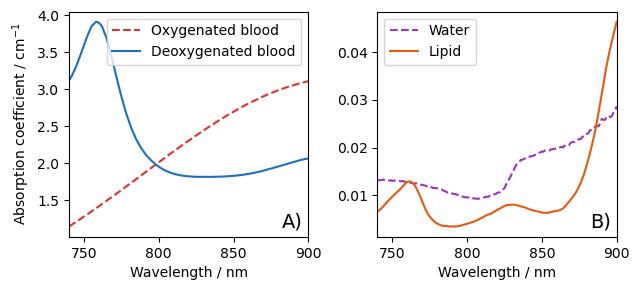

In [7]:
water_mol_per_liter = 55.5
blood_mol_per_liter = 150 / 64458 # gL-1 / gmol-1

wls = np.arange(740, 901, 1)
_, coeffs = extinction_coeffs(wls)

melanosomes_coeff = 519*(wls/500)**-3

names = ['Water', 'Oxygenated blood', 'Deoxygenated blood', 'Lipid']
factors = [water_mol_per_liter, blood_mol_per_liter, blood_mol_per_liter, 1]
ax_is = [1, 0, 0, 1]
linestyles = ['--', '--', '-', '-']
line_colors = [colors['grape'][8], colors['red'][8], colors['blue'][8], colors['orange'][8]]

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(6.5,3), sharex='all')

for name, factor, ax_i, color, coeff, linestyle in zip(names, factors, ax_is, line_colors, np.concatenate([coeffs, [melanosomes_coeff]]), linestyles):
    axs[ax_i].plot(wls, factor*coeff, label=name, color=color, linestyle=linestyle)

for ax in axs:
    ax.legend()
    ax.set_xlim((min(wls), max(wls)))
    ax.set_xlabel('Wavelength / nm')
axs[0].set_ylabel(r'Absorption coefficient / cm$^{-1}$')
plt.tight_layout()

for ax, text in zip(axs, ['A)', 'B)']):
    add_text(text, ax)


plt.savefig('./figure_generation/figures/extinction_coefficients.png', dpi=600, transparent=True)
plt.savefig('./figure_generation/figures/extinction_coefficients.pdf', dpi=600, transparent=True)
plt.show()